This notebook relies on first downloading [this CSV](https://github.com/COBA-NIH/2023_ImageAnalysisSurvey/blob/main/Bridging%20Imaging%20Users%20to%20Imaging%20Analysis%20-%202022%20(Responses)%20-%20Form%20Responses%201.csv) from Sivagurunathan et al, 2023 (in preparation)

In [1]:
import pandas
import seaborn as sns

In [2]:
df = pandas.read_csv('Bridging Imaging Users to Imaging Analysis - 2022 (Responses) - Form Responses 1.csv')

In [3]:
job_col = 'How would you describe your work?'
comf_col = 'How would you rate your comfort in developing new computational skills?'
skills_col = 'How would you rate your computational skills?'

In [4]:
sub_df = df[[job_col,comf_col]].dropna().astype('int32')
cooc = sub_df.groupby([job_col,comf_col]).size().reset_index()

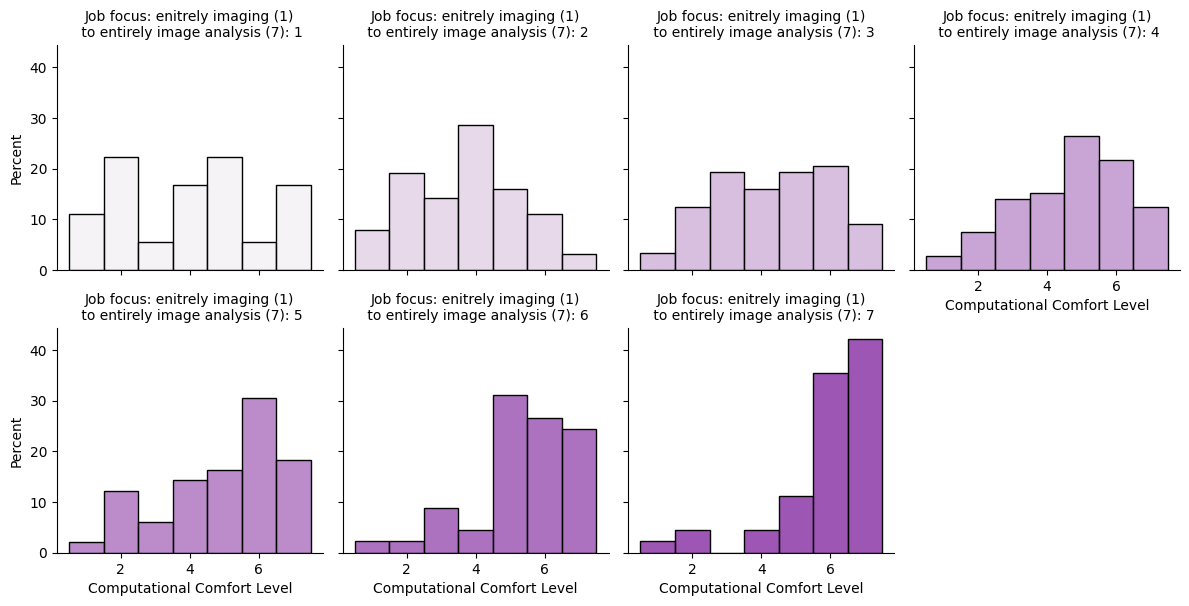

In [5]:
g = sns.FacetGrid(sub_df,col=job_col,hue=job_col,palette=sns.light_palette('xkcd:purple',n_colors=7),col_wrap=4)
g.map_dataframe(sns.histplot,x=comf_col,stat='percent',discrete=True)
g.set_axis_labels("Computational Comfort Level", "Percent")
g.set_titles(col_template="Job focus: enitrely imaging (1)\n to entirely image analysis (7): {col_name}")

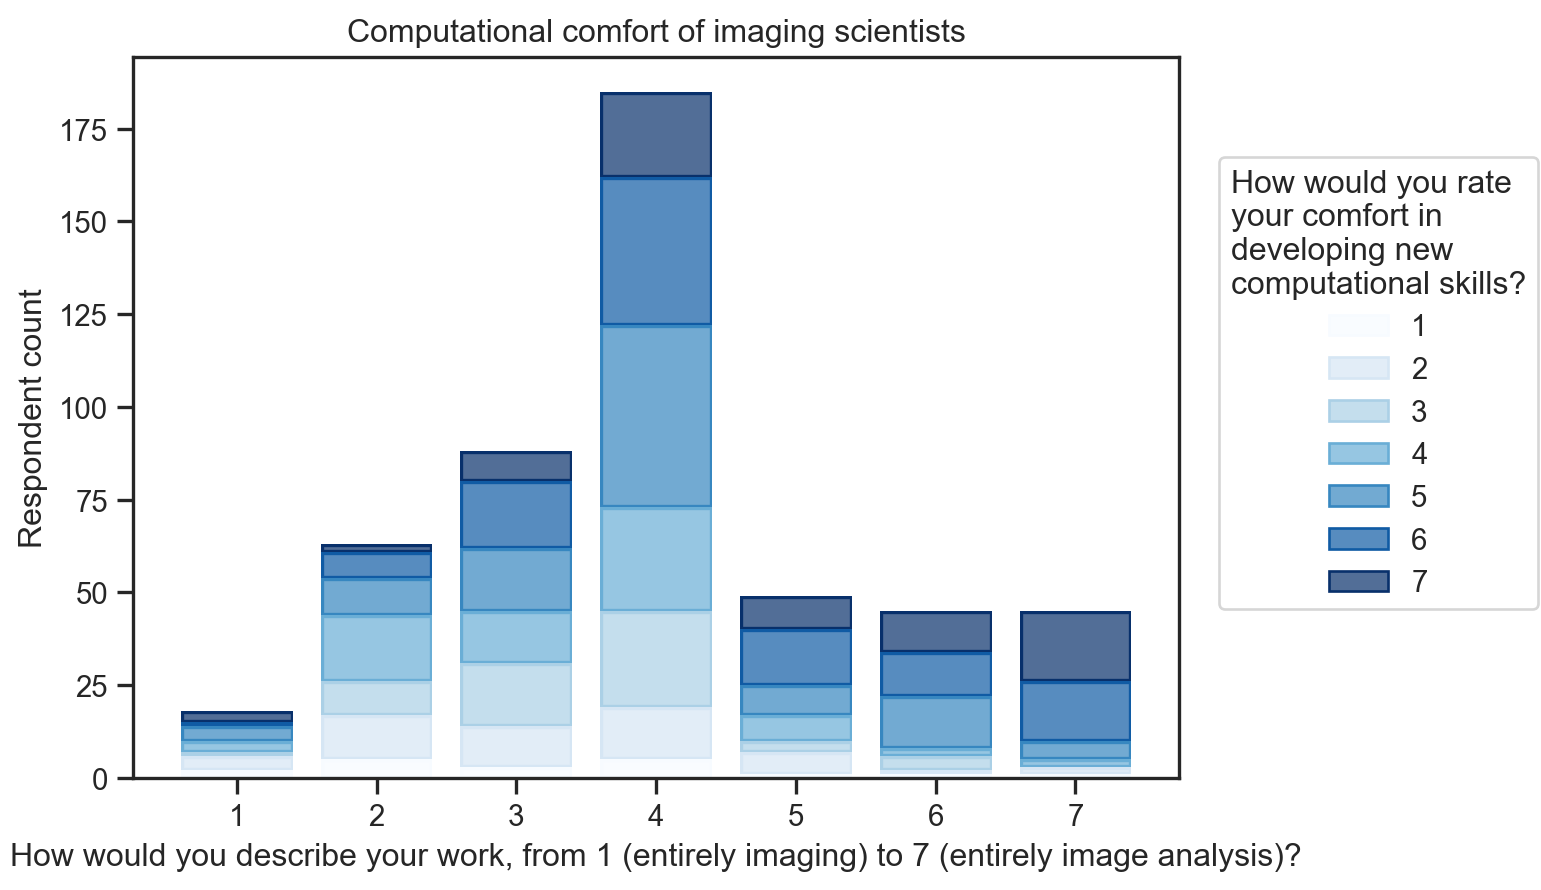

In [6]:
import seaborn.objects as so
p = so.Plot(sub_df, x=job_col, color=comf_col).add(so.Bar(), so.Count(), so.Stack()).scale(color=so.Continuous("Blues").tick(at=[1, 2, 3, 4,5,6,7]))
from seaborn import axes_style
p.label(y='Respondent count',title='Computational comfort of imaging scientists',x='How would you describe your work, from 1 (entirely imaging) to 7 (entirely image analysis)?',color='How would you rate\nyour comfort in\ndeveloping new\ncomputational skills?').theme({**axes_style("ticks")})


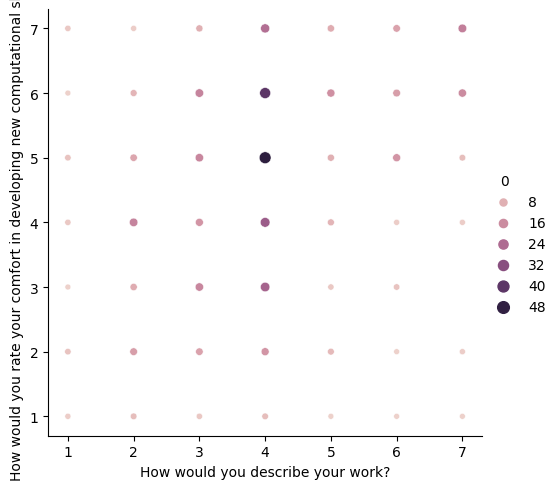

In [7]:
sns.relplot(cooc,x=job_col,y=comf_col,size=0,hue=0)

<Axes: xlabel='How would you describe your work?', ylabel='How would you rate your comfort in developing new computational skills?'>

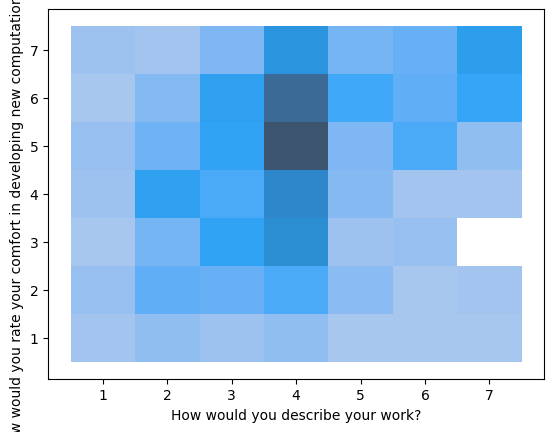

In [8]:
sns.histplot(sub_df,y=comf_col,x=job_col,multiple='stack',discrete=True,)

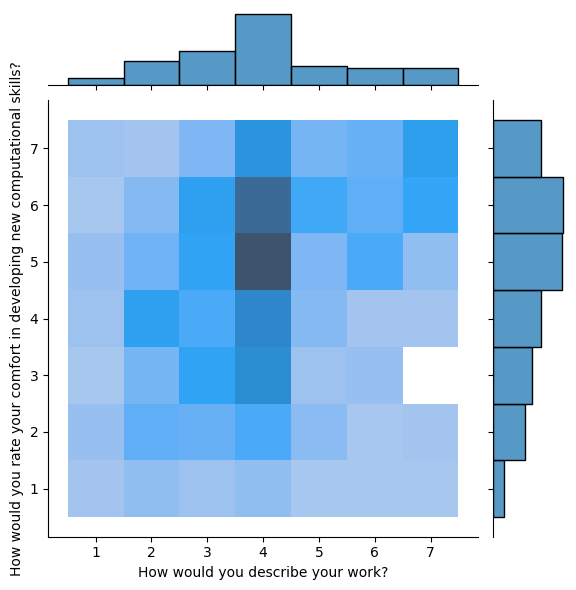

In [9]:
sns.jointplot(sub_df,y=comf_col,x=job_col,kind="hist",discrete=True,marginal_kws={'discrete':True})